In [303]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import cv
from PIL import Image

In [304]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [305]:
import pickle
with open(F"/root/fujii/play_SAM/datasets/771_1stframe_img.pkl", mode="rb") as f:
    image_dict = pickle.load(f)    

In [306]:
image = image_dict['025']
#image

In [307]:
#image = cv2.imread('/root/fujii/play_SAM/image/groceries.jpg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(image)

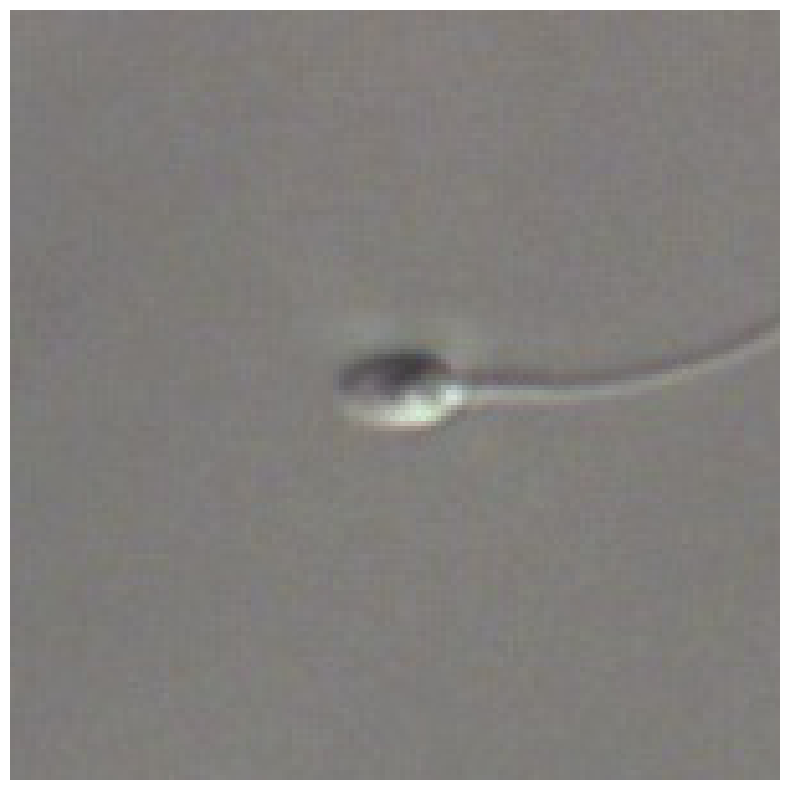

In [308]:
plt.figure(figsize=(10,10))
plt.imshow(pil_image)
plt.axis('off')
plt.show()

In [309]:
import sys
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

#sam_checkpoint = "/root/fujii/play_SAM/sam_vit_h_4b8939.pth"
sam_checkpoint = "/root/fujii/play_SAM/sam_vit_l_0b3195.pth"
#sam_checkpoint = "/root/fujii/play_SAM/sam_vit_b_01ec64.pth"
#model_type = "vit_h"
model_type = "vit_l"
#model_type = "vit_b"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1024, out_features=3072, bias=True)
          (proj): Linear(in_features=1024, out_features=1024, bias=True)
        )
        (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1024, out_features=4096, bias=True)
          (lin2): Linear(in_features=4096, out_features=1024, bias=True)
          (act): GELU()
        )
      )
      (1): Block(
        (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1024, out_features=3072, bias=True)
          (proj): Linear(in_features=1024, out_features=1024, bias=True)
        

In [310]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=15,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    box_nms_thresh=1.0,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)

In [311]:
masks2 = mask_generator_2.generate(image)

In [312]:
len(masks2)

6

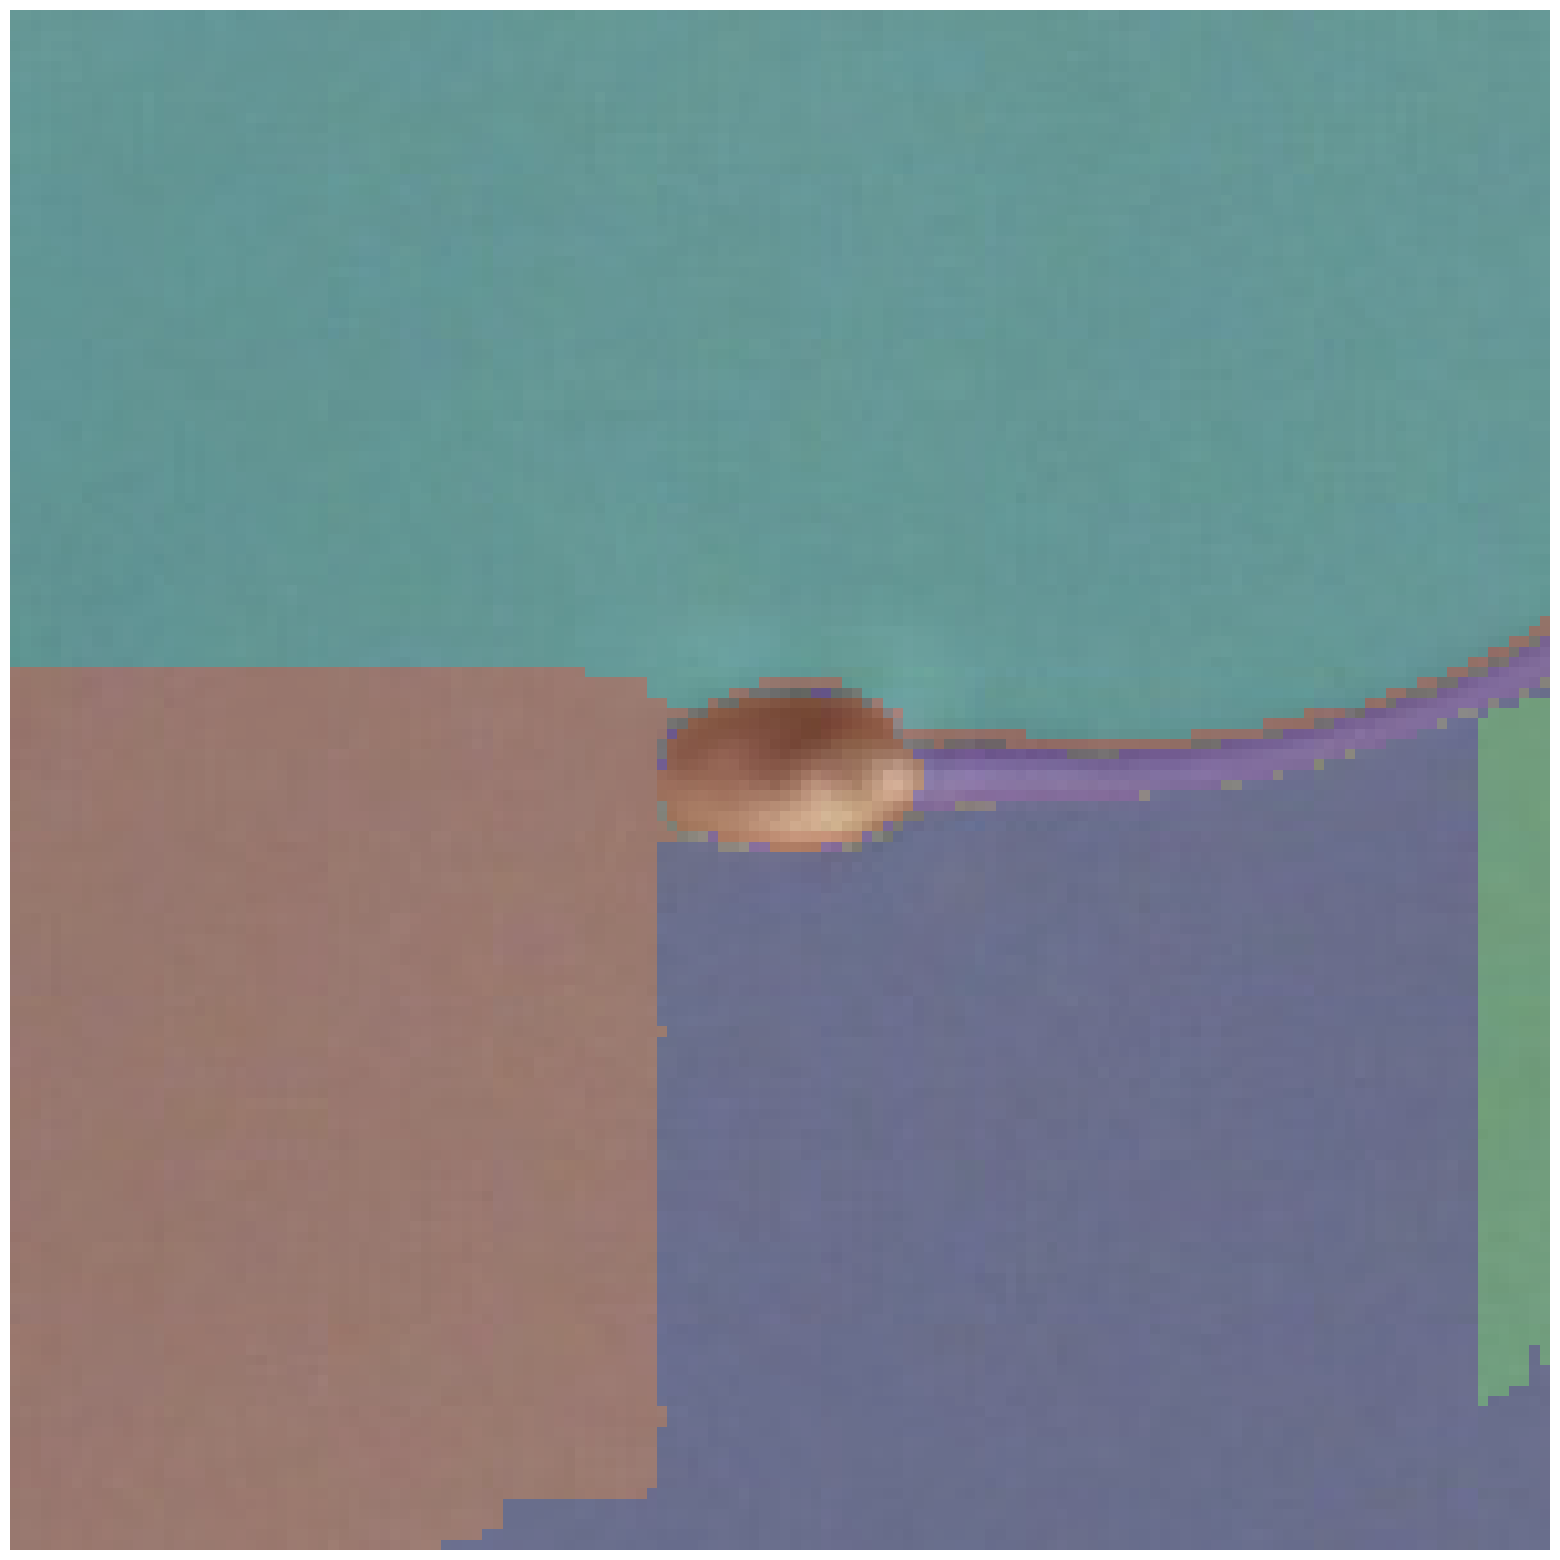

In [313]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show() 